# <center>Problem Set 5

### Question 1

Since the cylinder is a conductor, there is no electric field or potential on its inside. On the surface of the cylinder we have a fixed potential $V=V_0$, and on the walls of the "box" we have $V=0$. Between these two boundaries, the Poisson equation is valid: $∇^2V = -4πρ$. Where:

$V(r<R_0)=V_0$, 
$V(r>R_W)= 0$. 

I've assumed a cylindrical box for simplicity of our boundary conditions. We now want to discretize this in order to code it. From Taylor expansion, we know that: 

$V(r+h)=V(r)+hV' + \frac{1}{2}h^2V'' + O(h^3) $

So: 

$V(r+h)+V(r-h)=2V(r)+h^2V'' + O(h^4) $

$V''≈(V(r+h)+V(r-h)-2V)/h^2$

With partial derivatives, we simply let one variable vary while the others are fixed. Therefore, in cartesian coordinates: 

$∇^2V=\frac{∂^2V}{∂x^2} + \frac{∂^2V}{∂y^2}$

$∇^2V=(V(x+h,y)+V(x-h,y)+V(x+h,y)+V(x-h,y)-4V)/h^2$

Between the boundary conditions, we have no charges, so we can put $∇^2V=0$ and calculate $V=V(x+h,y)+V(x-h,y)+V(x+h,y)+V(x-h,y))/4$. By iterating this many times over our space until we have reached a small enough tolerance, we get an approximate value of our potential. 

Here are our boundary conditions:


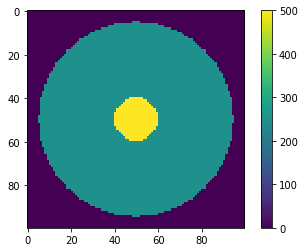

In [86]:
import numpy as np 
from matplotlib import pyplot as plt
N=100
V0=500
V=np.zeros([N,N])+V0/2 #as an abritrary starting guess we pick half of V0
rc=10
R=45

X,Y=np.meshgrid(np.linspace(-N/2,N/2,N),np.linspace(-N/2,N/2,N))
x0,y0=np.where(np.sqrt((X)**2+(Y)**2)< rc)
XR,YR=np.where(np.sqrt((X)**2+(Y)**2)> R)
V[x0,y0]=V0
V[XR,YR]=0
print("Here are our boundary conditions:")
plt.imshow(V)
plt.colorbar()

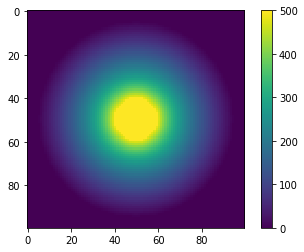

In [11]:
N=100
V=np.zeros([N,N])+V0/2 #as an abritrary starting guess we pick half of V0
rc=10
V0=500
Rw=45
X,Y=np.meshgrid(np.linspace(-N/2,N/2,N),np.linspace(-N/2,N/2,N))
x0,y0=np.where(np.sqrt((X)**2+(Y)**2)< rc)
XR,YR=np.where(np.sqrt((X)**2+(Y)**2)> Rw)
V[x0,y0]=V0
V[XR,YR]=0
V_new=np.zeros([N,N])
t=1
while t>10e-3:
    L=L+1
    for i in range(1,N-2):
        for j in range(1,N-2):
                V_new[i,j]=(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])*0.25
                
    V_new[x0,y0]=V0
    V_new[XR,YR]=0
    t=np.max(np.abs(V_new-V))
    V=V_new
    V_new=np.zeros([N,N])

plt.imshow(V)
plt.colorbar()

To find rho, we return to Poisson's equation: $∇^2𝑉=−4πρ$ and $∇^2𝑉=(𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦)+𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦)−4𝑉)/$

$4πρ=4V-(𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦)+𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦))$

$πρ=V-(𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦)+𝑉(𝑥+ℎ,𝑦)+𝑉(𝑥−ℎ,𝑦))/4$

For V0=500 V, ρ has a value of  0.027122927721256622  C.m-3 on the cylinder surface, and a value of  -0.6331508439930826 C.m-3 on the walls.
On the cylinder, the charge per unit length is: 0.0008633496035924377 C.m-2


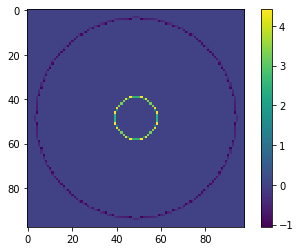

<Figure size 432x288 with 0 Axes>

In [5]:
rho=(V[1:-1,1:-1]-(V[1:-1,0:-2]+V[1:-1,2:]+V[:-2,1:-1]+V[2:,1:-1])/4.0)/np.pi
plt.imshow(rho)
plt.colorbar()
plt.figure()
rho_search=rho.flatten()
rho_cyl=[]
rho_wall=[]
for i in range(np.size(rho_search)):
    if rho_search[i]>0:
        rho_cyl.append(rho_search[i])
    elif rho_search[i]<0:
        rho_wall.append(rho_search[i])
print("For V0=500 V, ρ has a value of ",np.average(rho_cyl)," C.m-3 on the cylinder surface, and a value of ",np.average(rho_wall),"C.m-3 on the walls.")
print("On the cylinder, the charge per unit length is:",np.average(rho_cyl)/(1*np.pi*rc),"C.m-2")

We see that $\rho$ is positive on the surface of the cylinder and negative on the walls, zero inside the cylinder and outside of it. This is what we might expect from our source of charge being the cylinder's surface and the walls being kept at V=0. 

### Question 2

We now want to solve this using a conjuguate gradient.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
N=100
V0=500
V=np.zeros([N,N])+V0/2 #as an abritrary starting guess we pick half of V0
rc=10
R=45

X,Y=np.meshgrid(np.linspace(-N/2,N/2,N),np.linspace(-N/2,N/2,N))
x0,y0=np.where(np.sqrt((X)**2+(Y)**2)< rc)
XR,YR=np.where(np.sqrt((X)**2+(Y)**2)> R)
V[x0,y0]=V0
V[XR,YR]=0

def Ax(V):
    #Vuse=np.zeros([V.shape[0]+2,V.shape[1]+2])
    #Vuse[1:-1,1:-1]=V
    Vuse=V.copy()
    Vuse[XR,YR]=0
    Vuse[x0,y0]=V0
    ans=(Vuse[1:-1,:-2]+Vuse[1:-1,2:]+Vuse[2:,1:-1]+Vuse[:-2,1:-1])/4.0
    ans=ans-V[1:-1,1:-1]
    return ans

def pad(A):
    AA=np.zeros([A.shape[0]+2,A.shape[1]+2])
    AA[1:-1,1:-1]=A
    return AA

bc=0*V
b=-(bc[1:-1,0:-2]+bc[1:-1,2:]+bc[:-2,1:-1]+bc[2:,1:-1])/4.0
V=0*bc
r=b-Ax(V)
p=r.copy()
T=1
loop=0
while T>10e-3:
    loop=loop+1
    Ap=(Ax(pad(p)))
    rtr=np.sum(r*r)
    #print('on iteration ' + repr(k) + ' residual is ' + repr(rtr))
    alpha=rtr/np.sum(Ap*p)

    V=V+pad(alpha*p)
    rnew=r-alpha*Ap
    T=np.average(np.abs(r-rnew))
    beta=np.sum(rnew*rnew)/rtr
    p=rnew+beta*p
    r=rnew
    

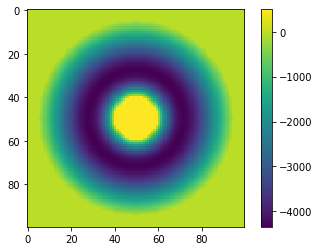

In [9]:

for i in range(2*N):
    V[1:-1,1:-1]=(V[1:-1,0:-2]+V[1:-1,2:]+V[:-2,1:-1]+V[2:,1:-1])/4.0
    V[XR,YR]=0
    V[x0,y0]=V0
    #plt.clf()
plt.imshow(V)
plt.colorbar()

In [13]:
print("Since my results are quite different, I must have gotten an answer wrong. But it takes", loop,"steps for the conjuguate gradient method to converge to 10e-3 accuracy, whereas it only takes",L,"for the relaxation method.")

Since my results are quite different, I must have gotten an answer wrong. But it takes 38814 steps for the conjuguate gradient method to converge to 10e-3 accuracy, whereas it only takes 1645 for the relaxation method.


### Question 3

Evaluate boundary conditions at coarse resolution: 

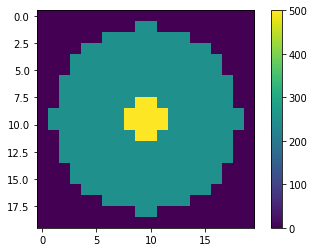

In [11]:
N=100
V0=500
V=np.zeros([20,20])+V0/2 #as an abritrary starting guess we pick half of V0
rc=10
R=45
x=np.linspace(-N/2,N/2,20)
y=np.linspace(-N/2,N/2,20)
X,Y=np.meshgrid(x,y)
x0,y0=np.where(np.sqrt((X)**2+(Y)**2)< rc)
XR,YR=np.where(np.sqrt((X)**2+(Y)**2)> R)
V[x0,y0]=V0
V[XR,YR]=0
plt.imshow(V)
plt.colorbar()


Solve for that resolution:

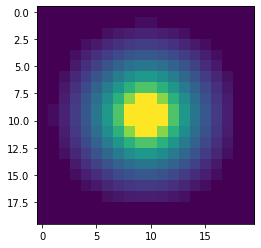

In [12]:
V_new=np.zeros([20,20])
t=1
while t>10e-3:
    for i in range(1,20-2):
        for j in range(1,20-2):
                V_new[i,j]=(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])*0.25
                
    V_new[x0,y0]=V0
    V_new[XR,YR]=0
    t=np.max(np.abs(V_new-V))
    V=V_new
    V_new=np.zeros([20,20])
plt.imshow(V)

Interpolate to a better resolution:

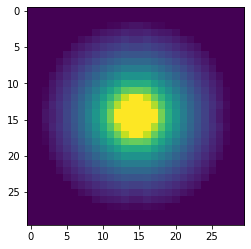

In [14]:
from scipy import interpolate

xx=np.linspace(-N/2,N/2,20)
yy=np.linspace(-N/2,N/2,20)
XX,YY=np.meshgrid(xx,yy)
xnew = np.linspace(-N/2,N/2,30)
ynew = np.linspace(-N/2,N/2,30)
f=interpolate.interp2d(XX,YY,V,kind='quintic')
V_int=f(xnew,ynew)
Xnew,Ynew=np.meshgrid(xnew,ynew)
x0,y0=np.where(np.sqrt((Xnew)**2+(Ynew)**2)< rc)    
XR,YR=np.where(np.sqrt((Xnew)**2+(Ynew)**2)> R)
V_int[x0,y0]=V0
V_int[XR,YR]=0

plt.imshow(V_int)


### Question 4

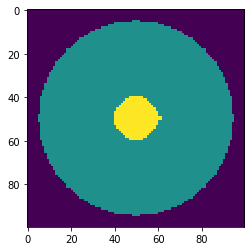

In [57]:
N=100
V=np.zeros([N,N])+V0/2 #as an abritrary starting guess we pick half of V0
rc=10
V0=500
Rw=45
X,Y=np.meshgrid(np.linspace(-N/2,N/2,N),np.linspace(-N/2,N/2,N))
xb,yb=np.where(np.sqrt((X-1.1*rc)**2+(Y)**2)< 0.1*rc) #our bump
x0,y0=np.where(np.sqrt((X)**2+(Y)**2)< rc)
XR,YR=np.where(np.sqrt((X)**2+(Y)**2)> Rw)
V[x0,y0]=V0
V[XR,YR]=0
V[xb,yb]=V0
plt.imshow(V)

$E = −∇V = -(∂V/∂x + ∂V/∂y)$

$E≈ (V(x-h,y)-V(x+h,y)+V(x,y-h)-V(x,y+h))/2h$

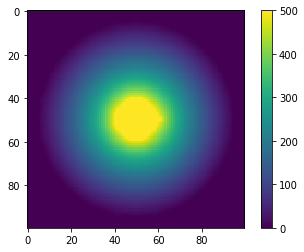

In [58]:
V_new=np.zeros([N,N])+V0/2
E=np.zeros([N,N])
V_new[x0,y0]=V0
V_new[XR,YR]=0
V_new[xb,yb]=V0
t=1
while t > 10e-3 :
    for i in range(1,N-2):
        for j in range(1,N-2):
                V_new[i,j]=(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])*0.25
                E[i,j]=(V[i-1,j]-V[i+1,j]+V[i,j-1]+V[i,j+1])*0.5
    V_new[x0,y0]=V0
    V_new[XR,YR]=0
    V_new[xb,yb]=V0
    t=np.average(np.abs(V_new-V))
    V=V_new
    V_new=np.zeros([N,N])

plt.imshow(V)
plt.colorbar()

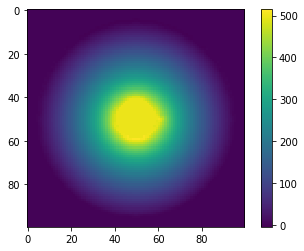

In [59]:
plt.imshow(E)
plt.colorbar()
print("Here is the Electric field")

Electric Field near the bump:

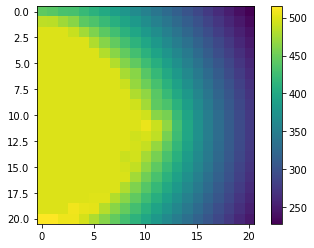

In [68]:
Ebump=E[np.min(xb)-10:np.max(xb)+10,np.min(yb)-10:np.max(yb)+10]
plt.imshow(Ebump)
plt.colorbar()

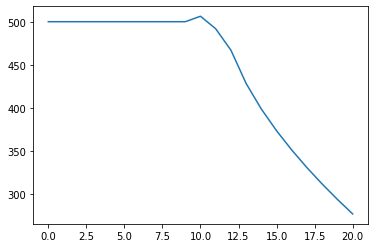

In [73]:
plt.plot(Ebump[11,:])

Electric Field on the surface of the wire away from the bump:

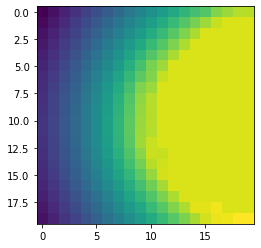

In [84]:
E_nobump=E[40:60,30:50]
plt.imshow(E_nobump)

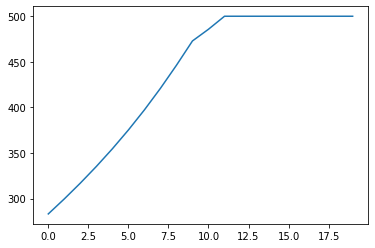

In [85]:
plt.plot(E_nobump[10,:])

We thus see a rise in the electric field where the bump is.

### Question 5

The heat equation takes the form: 

$∂u/∂t=k∇^2u+Q/cp$

where: 
u(x,t) = Temperature at any point  x  and any time  t 
c(x) = Specific Heat 
Q (x,t) = Heat energy generated per unit volume per unit time 

If we say that there are no external sources of heat or sinks, we can set Q(x,t)=0. 

Our equation becomes: 
$∂u/∂t=k∇^2u$

However, I'm not sure how to code this...